# Session #8 Homework

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

## Model

In [2]:
# Create the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [3]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
loss = tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

## Question 1

Since we have a binary classification problem, what is the best loss function for us?

`BinaryCrossentropy` is the best loss function for our problem.

## Question 2

What's the total number of parameters of the model?

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

Total number of parameters of the model is `11,215,873`.

## Generators and Training

In [5]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    "./train",
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary",
    shuffle=True
)

Found 20000 images belonging to 2 classes.


In [6]:
train_ds.class_indices

{'cats': 0, 'dogs': 1}

In [7]:
val_gen = ImageDataGenerator(rescale=1./255)

val_ds = val_gen.flow_from_directory(
    "./validation",
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary",
    shuffle=True
)

Found 5000 images belonging to 2 classes.


In [8]:
history = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 25s 248ms/step - loss: 0.6945 - accuracy: 0.5380 - val_loss: 0.6829 - val_accuracy: 0.5790
Epoch 2/10
100/100 [==============================] - 25s 251ms/step - loss: 0.6845 - accuracy: 0.5460 - val_loss: 0.6793 - val_accuracy: 0.5550
Epoch 3/10
100/100 [==============================] - 25s 246ms/step - loss: 0.6801 - accuracy: 0.5650 - val_loss: 0.6732 - val_accuracy: 0.5840
Epoch 4/10
100/100 [==============================] - 28s 276ms/step - loss: 0.6655 - accuracy: 0.5945 - val_loss: 0.6939 - val_accuracy: 0.5310
Epoch 5/10
100/100 [==============================] - 32s 319ms/step - loss: 0.6607 - accuracy: 0.5890 - val_loss: 0.6615 - val_accuracy: 0.6100
Epoch 6/10
100/100 [==============================] - 26s 263ms/step - loss: 0.6636 - accuracy: 0.6070 - val_loss: 0.6418 - val_accuracy: 0.6310
Epoch 7/10
100/100 [==============================] - 24s 242ms/step - loss: 0.6495 - accuracy: 0.6160 - val_loss: 0.6478 - val_ac

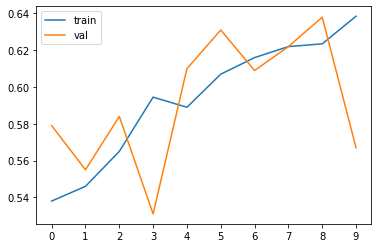

In [9]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.xticks(np.arange(10))
plt.legend()
plt.show()

## Question 3

What is the median of training accuracy for this model?

In [10]:
np.median(history.history["accuracy"]).round(3)

0.601

## Question 4

What is the standard deviation of training loss for this model?

In [11]:
np.std(history.history["loss"]).round(3)

0.018

## Data Augmentation

In [12]:
train_gen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_ds_aug = train_gen_aug.flow_from_directory(
    "./train",
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary",
    shuffle=True
)

Found 20000 images belonging to 2 classes.


In [13]:
history_aug = model.fit(
    train_ds_aug,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 29s 293ms/step - loss: 0.6648 - accuracy: 0.5970 - val_loss: 0.6266 - val_accuracy: 0.6600
Epoch 2/10
100/100 [==============================] - 29s 293ms/step - loss: 0.6640 - accuracy: 0.5990 - val_loss: 0.6313 - val_accuracy: 0.6220
Epoch 3/10
100/100 [==============================] - 29s 294ms/step - loss: 0.6561 - accuracy: 0.5980 - val_loss: 0.6275 - val_accuracy: 0.6440
Epoch 4/10
100/100 [==============================] - 29s 295ms/step - loss: 0.6596 - accuracy: 0.5910 - val_loss: 0.6361 - val_accuracy: 0.6090
Epoch 5/10
100/100 [==============================] - 29s 291ms/step - loss: 0.6549 - accuracy: 0.6040 - val_loss: 0.6099 - val_accuracy: 0.6820
Epoch 6/10
100/100 [==============================] - 29s 294ms/step - loss: 0.6506 - accuracy: 0.6015 - val_loss: 0.6463 - val_accuracy: 0.6020
Epoch 7/10
100/100 [==============================] - 29s 293ms/step - loss: 0.6529 - accuracy: 0.6305 - val_loss: 0.6198 - val_ac

## Question 5

What is the mean of validation loss for the model trained with augmentations?

In [14]:
np.mean(history_aug.history["val_loss"]).round(3)

0.631

## Question 6

What's the average of validation accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

In [15]:
np.mean(history_aug.history["val_accuracy"][5:]).round(3)

0.629